In [372]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [373]:
sentences = [];labels=[]
file = open('./Archive/Archive/a2-data/books.txt', "r", encoding='utf-8')  
fileData = file.readlines()
file.close()
for data in fileData:
    splitData = data.split("	")
    sentences.append(splitData[1].split("\n")[0])
    labels.append(splitData[0])

In [374]:
df = pd.DataFrame()
df["sentences"] = sentences
df["labels"] = labels

In [375]:
df.tail()

,sentences,labels
19531,"“Certainly we shall all rise again, certainly ...",Fyodor Dostoyevsky
19532,"“Ah, how splendid it will be!” broke from Kolya.",Fyodor Dostoyevsky
19533,"“Well, now we will finish talking and go to hi...",Fyodor Dostoyevsky
19534,"“And always so, all our lives hand in hand! Hu...",Fyodor Dostoyevsky
19535,THE END,Fyodor Dostoyevsky


In [376]:
authorList = list(df["labels"].unique())
id = 0;labelId = []
for data in list(df["labels"]):
    for i in range(0,len(authorList)):
        if data == authorList[i]:
            labelId.append(i)
df["labelId"] = labelId

# Data Processing

### Pre-Processing

In [377]:
import re


class Preprocessor:
    def __init__(self, punctuation=True, url=True, number=True):
        self.punctuation = punctuation
        self.url = url
        self.number = number

    def apply(self, sentence: str) -> str:
        """ Apply the preprocessing rules to the sentence
        Args:
            sentence: raw sentence
        Returns:
            sentence: clean sentence
        """
        sentence = sentence.lower()
        if self.url:
            sentence = Preprocessor.remove_url(sentence)
        if self.punctuation:
            sentence = Preprocessor.remove_punctuation(sentence)
        if self.number:
            sentence = Preprocessor.remove_number(sentence)
        sentence = re.sub(r'\s+', ' ', sentence)
        return sentence

    @staticmethod
    def remove_punctuation(sentence: str) -> str:
        """ Remove punctuations in sentence with re
        Args:
            sentence: sentence with possible punctuations
        Returns:
            sentence: sentence without punctuations
        """
        # Start your code here
        sentence = re.sub(r'[^\w\s]', '', sentence)
        # End
        return sentence

    @staticmethod
    def remove_url(sentence: str) -> str:
        """ Remove urls in text with re
        Args:
            sentence: sentence with possible urls
        Returns:
            sentence: sentence without urls
        """
        # Start your code here
        url_pattern = re.compile(r'https?://\S+|www\.\S+')
        sentence = url_pattern.sub("", sentence)
        # End
        return sentence

    @staticmethod
    def remove_number(sentence: str) -> str:
        """ Remove numbers in sentence with re
        Args:
            sentence: sentence with possible numbers
        Returns:
            sentence: sentence without numbers
        """
        # Start your code here
        sentence = re.sub(r'\d', '', sentence)
        # End
        return sentence

In [378]:
processor = Preprocessor()
preprocessed_sentence_list = []
for sentence in list(df["sentences"]):
    preprocessed_sentence_list.append(processor.apply(sentence))
df["preprocessed"] = preprocessed_sentence_list

In [379]:
df.head(10)

,sentences,labels,labelId,preprocessed
0,﻿PERSUASION,Jane Austen,0,persuasion
1,by Jane Austen,Jane Austen,0,by jane austen
2,(1818),Jane Austen,0,
3,Chapter 1,Jane Austen,0,chapter
4,"Sir Walter Elliot, of Kellynch Hall, in Somers...",Jane Austen,0,sir walter elliot of kellynch hall in somerset...
5,"""ELLIOT OF KELLYNCH HALL.",Jane Austen,0,elliot of kellynch hall
6,"""Walter Elliot, born March 1, 1760, married, J...",Jane Austen,0,walter elliot born march married july elizabet...
7,Precisely such had the paragraph originally st...,Jane Austen,0,precisely such had the paragraph originally st...
8,Then followed the history and rise of the anci...,Jane Austen,0,then followed the history and rise of the anci...
9,"""Heir presumptive, William Walter Elliot, Esq....",Jane Austen,0,heir presumptive william walter elliot esq gre...


## Tokenization

In [380]:
from nltk.tokenize import word_tokenize
from nltk import PorterStemmer
from nltk.corpus import stopwords

stopwords_set = set(stopwords.words('english'))
stemmer = PorterStemmer()
print(list(stopwords_set)[:10])

['other', 'hasn', 'very', "you'll", 'such', "it's", 'most', 'some', 'where', 'have']


In [381]:
tokensList = []
for sentence in list(df["preprocessed"]):
    split_words = sentence.split()
    stemmedWords = [stemmer.stem(words) for words in split_words]
    tokens = [words for words in stemmedWords if words not in stopwords_set]
    tokensList.append(tokens)

In [382]:
df["tokens"] = tokensList
df.head(10)

,sentences,labels,labelId,preprocessed,tokens
0,﻿PERSUASION,Jane Austen,0,persuasion,[persuas]
1,by Jane Austen,Jane Austen,0,by jane austen,"[jane, austen]"
2,(1818),Jane Austen,0,,[]
3,Chapter 1,Jane Austen,0,chapter,[chapter]
4,"Sir Walter Elliot, of Kellynch Hall, in Somers...",Jane Austen,0,sir walter elliot of kellynch hall in somerset...,"[sir, walter, elliot, kellynch, hall, somerset..."
5,"""ELLIOT OF KELLYNCH HALL.",Jane Austen,0,elliot of kellynch hall,"[elliot, kellynch, hall]"
6,"""Walter Elliot, born March 1, 1760, married, J...",Jane Austen,0,walter elliot born march married july elizabet...,"[walter, elliot, born, march, marri, juli, eli..."
7,Precisely such had the paragraph originally st...,Jane Austen,0,precisely such had the paragraph originally st...,"[precis, paragraph, origin, stood, printer, ha..."
8,Then followed the history and rise of the anci...,Jane Austen,0,then followed the history and rise of the anci...,"[follow, histori, rise, ancient, respect, fami..."
9,"""Heir presumptive, William Walter Elliot, Esq....",Jane Austen,0,heir presumptive william walter elliot esq gre...,"[heir, presumpt, william, walter, elliot, esq,..."


## Train test Split

In [383]:
from sklearn.model_selection import train_test_split

In [384]:
df["tokens"] = df["tokens"].apply(lambda tokens: " ".join(tokens)) #Convert list to string for tfidf

In [385]:
x_train,x_test,y_train,y_test = train_test_split(df["tokens"],df["labelId"],random_state=104,test_size=0.3, shuffle=True)

## TF-IDF

In [386]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [387]:
x_train_tfidf = tfidf.fit_transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [388]:
x_train_tfidf.shape

(13675, 16584)

In [389]:
distinct_tokens = tfidf.get_feature_names_out()
feature_dim = len(distinct_tokens)

In [390]:
y_train_tfidf = np.zeros((len(y_train), 3))
y_test_tfidf = np.zeros((len(y_test), 3))

In [391]:
y_train_tfidf[np.arange(len(y_train)), y_train] = 1
y_test_tfidf[np.arange(len(y_test)), y_test] = 1

In [392]:
y_train_tfidf.shape

(13675, 3)

## Neural Network

In [402]:
def sigmoid(z):
    return 1/(1+np.exp(-z))
def softmax(x: np.ndarray, axis: int = -1) -> np.ndarray:
    """ The softmax activation function
    Args:
        x: Input matrix or vector
        axis: The dimension of x that needs to run softmax, default -1, i.e., the last dimension
    Returns:
        output: Softmax value of the specified dimension in x
    """
    # Start your code here
    exp_scores = np.exp(x - np.max(x, axis=1, keepdims=True))
    x = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    # End
    return x

In [479]:
class Adagrad:
    def __init__(self,init_lr,mlp_model):
        self.r_w1 = 0
        self.r_w2 = 0
        self.r_b1 = 0
        self.r_b2 = 0
        self.init_lr = init_lr
        self.mlp_model = mlp_model
        self.eps = 1e-8

    def update_sum_sqd_gradient(self,dw1,dw2,db1,db2):
        self.r_w1 = self.r_w1 + dw1**2
        self.r_w2 = self.r_w2 + dw2**2
        self.r_b1 = self.r_b1 + db1**2
        self.r_b2 = self.r_b2 + db2**2
        new_dw1 = dw1/np.sqrt(self.r_w1 + self.eps) 
        new_dw2 = dw2/np.sqrt(self.r_w2 + self.eps) 
        new_db1 = db1/np.sqrt(self.r_b1 + self.eps) 
        new_db2 = db2/np.sqrt(self.r_b2 + self.eps) 
        self.mlp_model.gradient_descent(new_dw1,new_dw2,new_db1,new_db2,self.init_lr)

In [480]:
class MLP:
    def __init__(self,feature_dim: int,hidden_dim: int, num_of_class: int, lambda_: float):
        self.w1 = np.random.randn(feature_dim,hidden_dim)
        self.b1 = np.zeros((1,hidden_dim))
        self.w2 = np.random.randn(hidden_dim,num_of_class)
        self.b2 = np.zeros((1,num_of_class))
        self.lambda_ = lambda_
        self.eps = 1e-9

    def feedforward(self,x_train: np.ndarray):
        z1 = x_train @ self.w1 +self.b1
        h1 = sigmoid(z1)
        z2 = h1 @ self.w2 + self.b2
        h2 = y_hat = sigmoid(z2)
        return z1,h1,z2,h2

    def calculateLoss(self,softmax_output,y_train_tfidf):
        J = -1/y_train_tfidf.shape[0] * np.sum(y_train_tfidf * np.log(softmax_output)) + self.lambda_ * np.sum(np.square(self.w1)) + np.sum(np.square(self.w2))
        return J

    def backpropogation(self,z1,z2,h1,y_hat,x,y):
        w1, w2 = self.w1, self.w2
        dz2 = y_hat - y
        dw2 = np.transpose(h1) @ dz2
        db2 = np.sum(dz2,axis = 0,keepdims = True)
        dz1 = dz2 @ np.transpose(w2) * (h1 * (1-h1))
        dw1 = np.transpose(x) @ dz1
        db1 = np.sum(dz1,axis = 0,keepdims = True)
        return dw1,dw2,db1,db2
        
    def gradient_descent(self,dw1,dw2,db1,db2,lr):
        self.w1 = self.w1 - lr * dw1
        self.b1 = self.b1 - lr * db1
        self.w2 = self.w2 - lr * dw2
        self.b2 = self.b2 - lr * db2
    
    def predict(self, y_hat: np.ndarray) -> np.ndarray:
        """ Predict the label using the output y_hat
        Args:
            y_hat: Model output
        Returns:
            pred: Prediction
        """
        pred = np.zeros_like(y_hat)
        index = np.argmax(y_hat, axis=-1)
        pred[np.arange(len(y_hat)), index] = 1
        return pred

In [481]:
x_train = x_train_tfidf.toarray()
x_test = x_test_tfidf.toarray()

In [492]:
class Mini_Batch_GD:
    def __init__(self,mlp_model,batch_size):
        self.mlp_model = mlp_model
        self.batch_size = batch_size
    def fit(self,x,y,num_of_epochs,lr):
        adagrad_optimizer = Adagrad(lr,self.mlp_model)
        lossList = []
        for j in range(0,num_of_epochs):
            print("Progress : {}/{}".format(j,num_of_epochs))
            indices = np.random.permutation(len(x))
            x_train_1 = x[indices]
            y_train_1 = y[indices]
            #batch of 32
            for i in range(0,x.shape[0]-self.batch_size,self.batch_size):
                x_train = x_train_1[i:i+self.batch_size]
                y_train = y_train_1[i:i+self.batch_size]
                z1,h1,z2,h2 = self.mlp_model.feedforward(x_train)
                softmax_output = softmax(h2)
                J = self.mlp_model.calculateLoss(softmax_output,y_train)
                lossList.append(J)
                dw1,dw2,db1,db2 = self.mlp_model.backpropogation(z1,z2,h1,h2,x_train,y_train)
                adagrad_optimizer.update_sum_sqd_gradient(dw1,dw2,db1,db2)
                # self.mlp_model.gradient_descent(dw1,dw2,db1,db2,lr)
        return lossList
                

In [493]:
num_of_class = 3
lambda_ = 1e-8
hidden_dim = 128
lr = 1e-2
mlp = MLP(feature_dim,hidden_dim,num_of_class,lambda_)
mini_batch = Mini_Batch_GD(mlp,32)
lossList = mini_batch.fit(x_train,y_train_tfidf,10,lr)

Progress : 0/10
Progress : 1/10
Progress : 2/10
Progress : 3/10
Progress : 4/10
Progress : 5/10
Progress : 6/10
Progress : 7/10
Progress : 8/10
Progress : 9/10


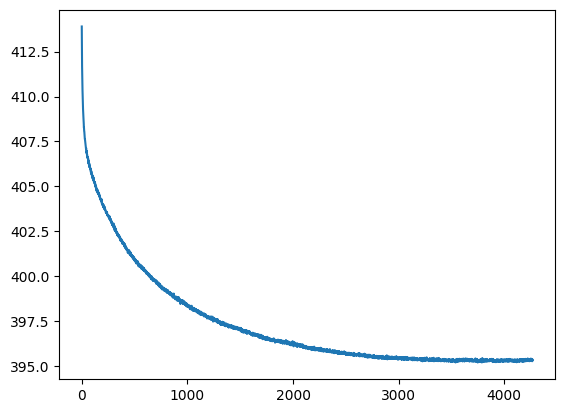

In [494]:
plt.plot(lossList)

In [495]:
z1,h1,z2,h2 = mlp.feedforward(x_test)
pred = mlp.predict(h2)

In [496]:
from sklearn.metrics import precision_recall_fscore_support
from typing import List, Tuple, Union

def get_metrics(y_pred: np.ndarray, y_true: np.ndarray) -> Tuple[float, np.ndarray, np.ndarray, np.ndarray]:
    """ Calculate the accuracy, precision, recall, and f1 score.
        You are allowed to use precision_recall_fscore_support from scikit-learn. Please set average to 'micro'
    Args:
        y_pred: Prediction
        y_true: Ground-truth
    Returns:
        accuracy: float number. The accuracy for the whole dataset
        precision, recall, f1: np.ndarray (num_class, ). The precision, recall, f1 for each class
    """
    assert y_pred.shape == y_true.shape
    accuracy, precision, recall, f1 = 0.0, 0.0, 0.0, 0.0
    # Start your code here
    correct_predictions = 0
    for i in range(0,len(y_true)):
        if all(y_pred[i] == y_true[i]):
            correct_predictions = correct_predictions + 1
        else:
            pass
    total_examples = len(y_true)
    accuracy = correct_predictions / total_examples
    precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred, average='micro')
    return accuracy, precision, recall, f1

In [497]:
pred.shape

(5861, 3)

In [498]:
y_test.shape

(5861,)

In [499]:
accuracy, precision, recall, f1 = get_metrics(pred,y_test_tfidf)

In [500]:
accuracy, precision, recall, f1

(0.853608599215151, 0.853608599215151, 0.853608599215151, 0.853608599215151)